In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from pandas import DataFrame
from pandas import options
from pandas import crosstab
import numpy as np
import csv
from sklearn import tree
import matplotlib.pyplot as plt

def RepresentsInt(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

moviesdata = []
profitclass = []
with open('./data/movies_metadata.csv', newline='', encoding="utf8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        genrelistdict = ast.literal_eval(row['genres'][0:])
        try:
            genre = genrelistdict[0]['name']
        except:
            genre = ""

        try:
            prodcountrylistdict = ast.literal_eval(row['production_countries'][0:])
            prodcountry = prodcountrylistdict[0]['name']
        except:
            prodcountry = ""

        try:
            prodcomplistdict = ast.literal_eval(row['production_companies'][0:])
            prodcomp = prodcomplistdict[0]['name']
        except:
            prodcomp = ""

        if row['budget'] != "0" and row['revenue'] != "0" and RepresentsInt(row['budget']) and row['runtime'] != "" and genre != "" and prodcountry != "" and prodcomp != "":

            budget = float(row['budget'])
            revenue = float(row['revenue'])
            runtime = float(row['runtime'])
            language = str(row['original_language'])
            vote_average = float(row['vote_average'])


            if revenue > 7017731:
                revenue = 1
            else:
                revenue = 0

            moviesdata.append([budget,runtime,language,vote_average,genre,prodcountry,prodcomp])
            profitclass.append(revenue)

moviesdata = DataFrame(moviesdata)
profitclass = DataFrame(profitclass)

ordinal = OrdinalEncoder()
X = ordinal.fit_transform(moviesdata)

y = np.ravel(profitclass)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.10)

# Decision tree just with scikit learn
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)

pred_dt = classifier.score(X_test, y_test)
print("Decision Tree Score before improvment: ", pred_dt, "\n")

y_test_predicted_dt = classifier.predict(X_test)
df_confusion_dt = crosstab(y_test, y_test_predicted_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Decision Tree Confusion Matrix before improvment: ")
print(df_confusion_dt)



Decision Tree Score before improvment:  0.7803468208092486 

Decision Tree Confusion Matrix before improvment: 
Predicted    0    1  All
Actual                  
0           61   54  115
1           60  344  404
All        121  398  519


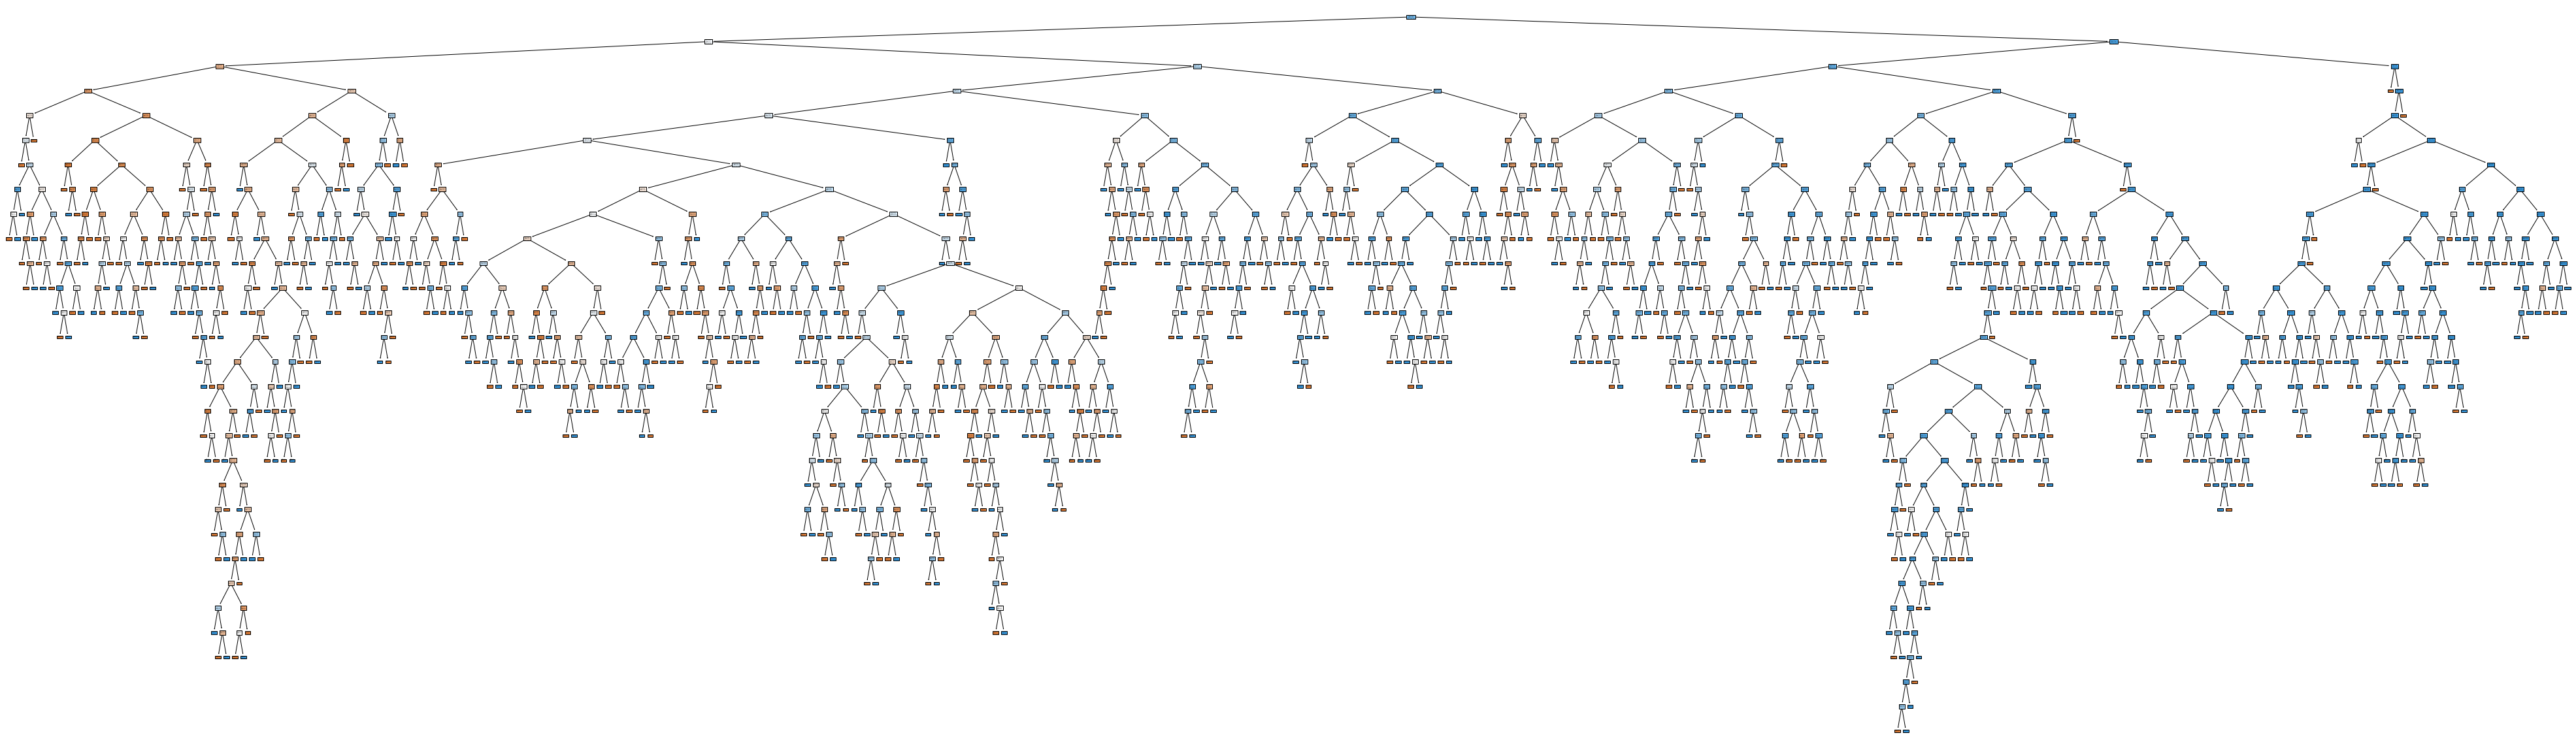

Figure 1: Decision tree showing the classification of data and parameters for splitting decision before improvment


In [10]:
plt.figure(figsize=[70.4, 20.8])
tree.plot_tree(classifier, filled = True)
plt.show()
print("Figure 1: Decision tree showing the classification of data and parameters for splitting decision before improvment")

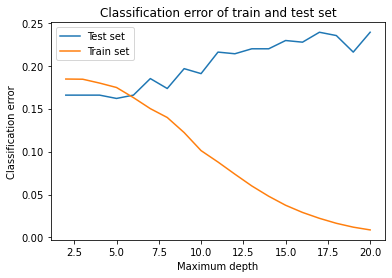

Figure 2: Plot showing the classification error (y-axis) for both the train and test set for level 2 to 20 of maximum depth (x-axis)


In [11]:
from sklearn.metrics import accuracy_score


depth_labels = []
class_error_test_list = []
class_error_train_list = []

for depth in range(2,21):
    clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=depth)
    clf = clf.fit(X_train, y_train)

    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    acc_score_test = accuracy_score(y_test, y_pred_test)
    acc_score_train = accuracy_score(y_train, y_pred_train)

    class_error_test = 1-acc_score_test
    class_error_train = 1-acc_score_train
    class_error_test_list.append(class_error_test)
    class_error_train_list.append(class_error_train)
    depth_labels.append(depth)
    
plt.title("Classification error of train and test set")
plt.plot(depth_labels, class_error_test_list)
plt.plot(depth_labels, class_error_train_list)
plt.xlabel("Maximum depth")
plt.ylabel("Classification error")
plt.legend(["Test set","Train set"])
plt.show()
print("Figure 2: Plot showing the classification error (y-axis) for both the train and test set for level 2 to 20 of maximum depth (x-axis)")

Decision Tree Score:  0.8227360308285164 

Decision Tree Confusion Matrix: 
Predicted   0    1  All
Actual                 
0          40   75  115
1          17  387  404
All        57  462  519


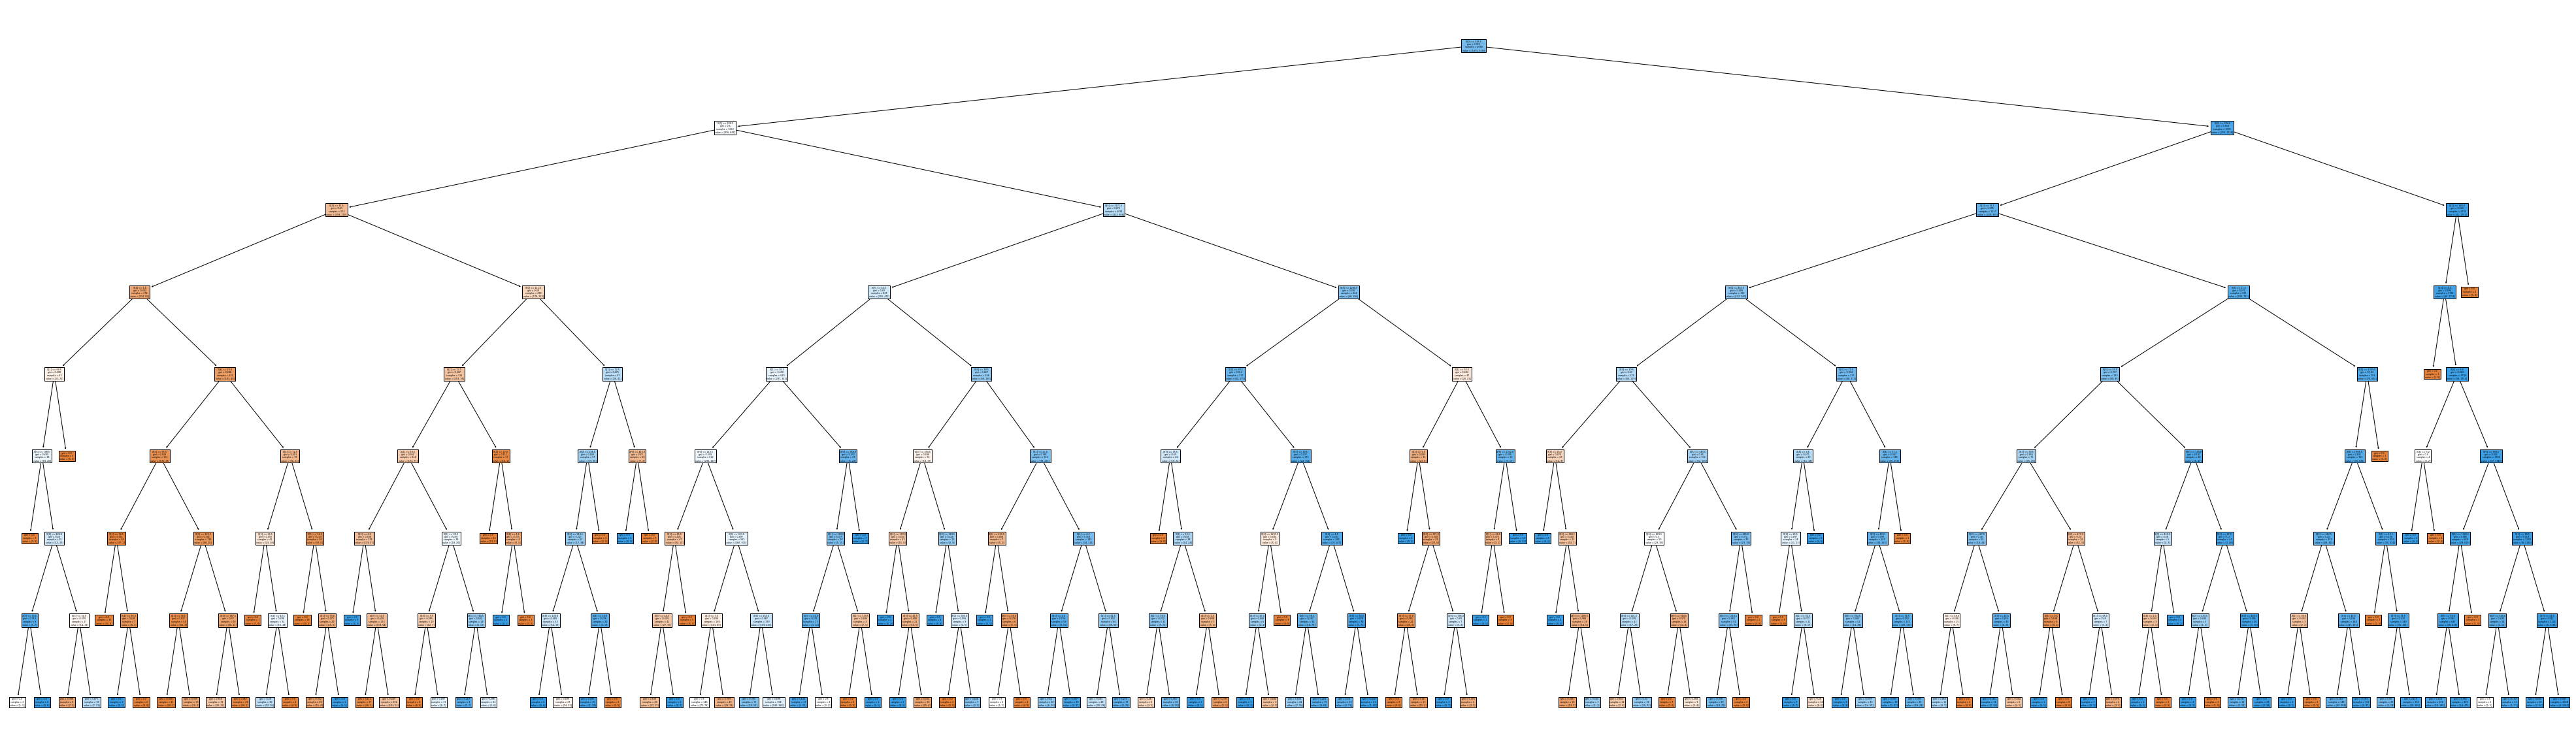

Figure 3: Decision tree showing the classification of data for splitting decision after improvment


In [12]:
classifier = tree.DecisionTreeClassifier(criterion="gini",max_depth=8)
classifier = classifier.fit(X_train, y_train)

pred_dt = classifier.score(X_test, y_test)
print("Decision Tree Score: ", pred_dt, "\n")

y_test_predicted_dt = classifier.predict(X_test)
df_confusion_dt = crosstab(y_test, y_test_predicted_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Decision Tree Confusion Matrix: ")
print(df_confusion_dt)

plt.figure(figsize=[70.4, 20.8])
tree.plot_tree(classifier, filled = True)
plt.show()
print("Figure 3: Decision tree showing the classification of data for splitting decision after improvment")